In [1]:
import numpy as np
import datetime
import glob
import os
import matplotlib.pyplot as plt
import cartopy
from matplotlib import gridspec
import itertools
import cartopy.crs as ccrs
import tqdm
import netCDF4 as nc 
from scipy.stats import linregress
from pyproj import Proj, Transformer
from scipy.interpolate import griddata

import warnings
import pickle
warnings.filterwarnings("ignore")


In [2]:
save_fig = 0

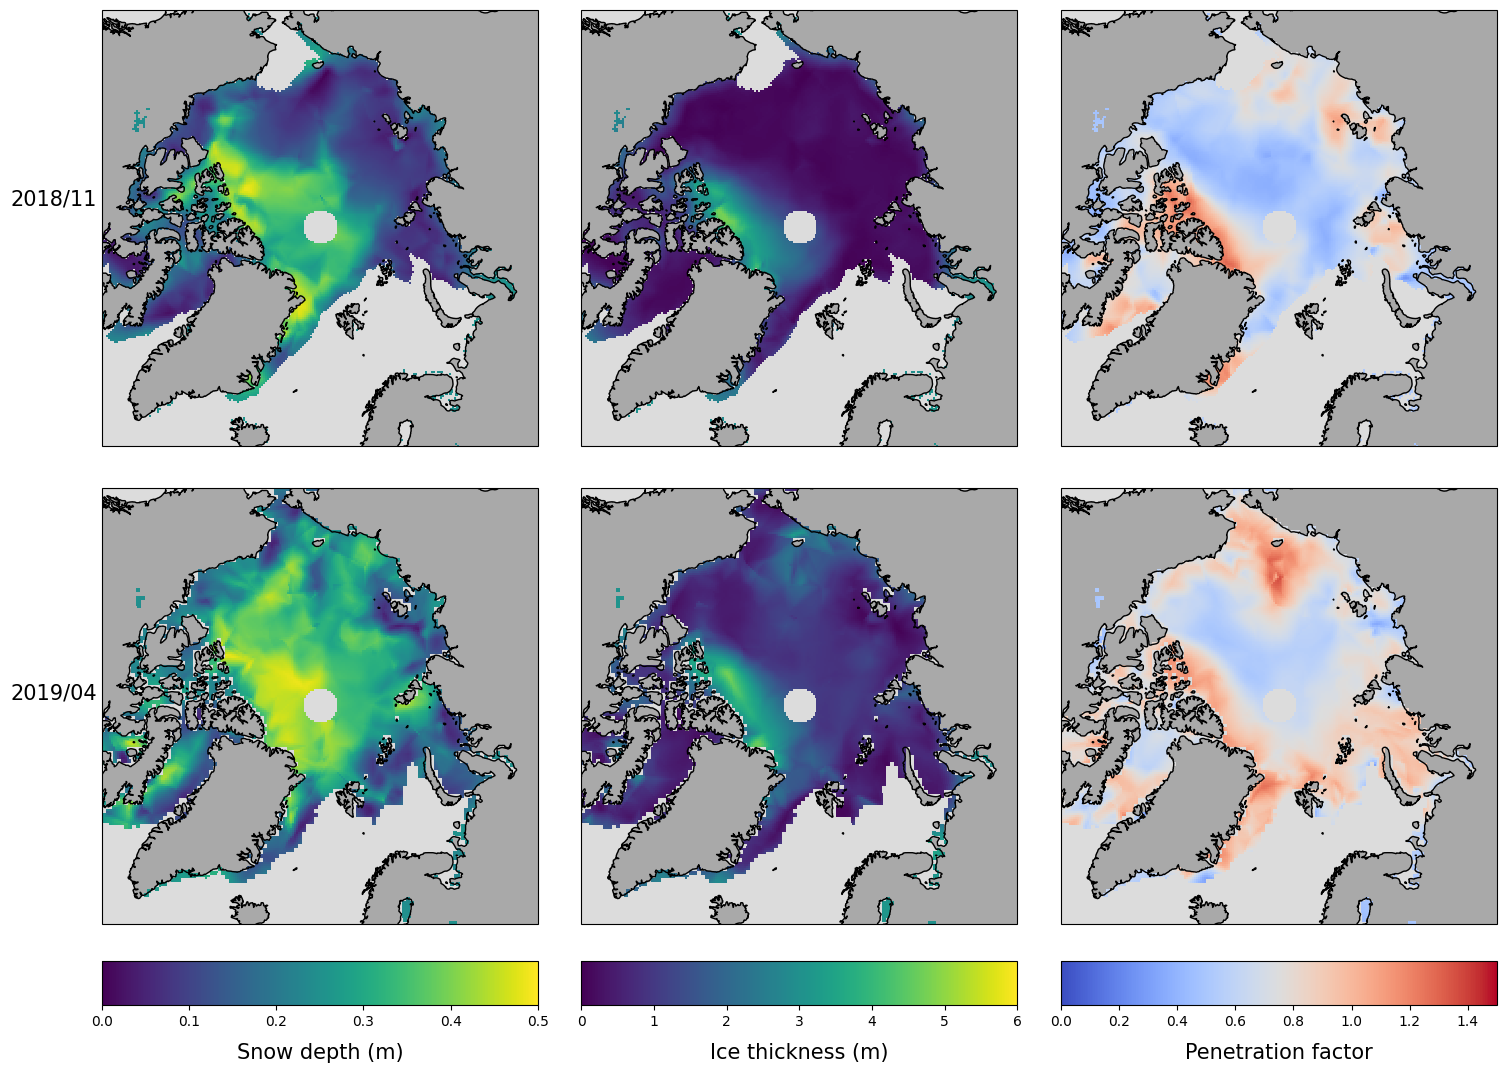

In [3]:
# change these according to date
snow_april = np.load("/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201904/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_snow.npy")
ice_april = np.load("/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201904/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_ice.npy")
cs_april = np.load("/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201904/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_penetration.npy")

snow_nov = np.load("/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201811/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_snow.npy")
ice_nov = np.load("/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201811/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_ice.npy")
cs_nov = np.load("/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201811/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_penetration.npy")



lon_g = np.load("/home/erb/masterproject/MSCI_project/new_lon_25km.npy")
lat_g = np.load("/home/erb/masterproject/MSCI_project/new_lat_25km.npy")


fig = plt.figure(figsize = (18,13))
spec = gridspec.GridSpec(ncols=3, nrows=3,wspace=0.1,hspace=0.1,height_ratios= [1, 1, 0.1])

ax1 = fig.add_subplot(spec[0], projection=ccrs.NorthPolarStereo())
ax1.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=0)
ax1.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
ax1.coastlines()
ax1.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
p_map = ax1.pcolormesh(lon_g,lat_g, snow_nov,cmap='viridis',alpha=1.0, transform=ccrs.PlateCarree(), vmin = 0, vmax = 0.5)


ax2 = fig.add_subplot(spec[1],projection=ccrs.NorthPolarStereo())
ax2.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=0)
ax2.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
ax2.coastlines()
ax2.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
p_map = ax2.pcolormesh(lon_g,lat_g, ice_nov,cmap='viridis',alpha=1.0, transform=ccrs.PlateCarree(), vmin = 0, vmax = 6)

ax2 = fig.add_subplot(spec[2],projection=ccrs.NorthPolarStereo())
ax2.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=0)
ax2.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
ax2.coastlines()
ax2.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
p_map = ax2.pcolormesh(lon_g,lat_g, cs_nov,cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree(), vmin = 0, vmax = 1.5)

ax1 = fig.add_subplot(spec[3], projection=ccrs.NorthPolarStereo())
ax1.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=0)
ax1.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
ax1.coastlines()
ax1.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
p_map_snow = ax1.pcolormesh(lon_g,lat_g, snow_april,cmap='viridis',alpha=1.0, transform=ccrs.PlateCarree(), vmin = 0, vmax = 0.5)


ax2 = fig.add_subplot(spec[4],projection=ccrs.NorthPolarStereo())
ax2.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=0)
ax2.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
ax2.coastlines()
ax2.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
p_map_ice = ax2.pcolormesh(lon_g,lat_g, ice_april,cmap='viridis',alpha=1.0, transform=ccrs.PlateCarree(), vmin = 0, vmax = 6)

ax2 = fig.add_subplot(spec[5],projection=ccrs.NorthPolarStereo())
ax2.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=0)
ax2.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
ax2.coastlines()
ax2.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
p_map_penetration = ax2.pcolormesh(lon_g,lat_g, cs_april,cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree(), vmin = 0, vmax = 1.5)


cax = fig.add_subplot(spec[6])
fig.colorbar(p_map_snow, cax =cax, orientation = "horizontal")
cax.xaxis.set_ticks_position('bottom')
cax.set_xlabel('Snow depth (m)', labelpad = 10, fontsize = 15)
cax.xaxis.set_label_position('bottom')

cax = fig.add_subplot(spec[7])
fig.colorbar(p_map_ice, cax =cax, orientation = "horizontal")
cax.xaxis.set_ticks_position('bottom')
cax.set_xlabel('Ice thickness (m)', labelpad = 10, fontsize = 15)
cax.xaxis.set_label_position('bottom')


cax = fig.add_subplot(spec[8])
fig.colorbar(p_map_penetration, cax =cax, orientation = "horizontal")
cax.xaxis.set_ticks_position('bottom')
cax.set_xlabel('Penetration factor', labelpad = 10, fontsize = 15)
cax.xaxis.set_label_position('bottom')



date = ["2018/11", "2019/04"]

fig.text(0.098, 0.73, date[0], va='center', ha='center', fontsize=15)
fig.text(0.098, 0.35, date[1], va='center', ha='center', fontsize=15)

if save_fig == 1:
    plt.savefig('/home/erb/masterproject/MSCI_project/snow_ice/figures_paper/figures/fig6.png', dpi = 300)

In [4]:
path_files_penetration = ['/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201811/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_penetration.npy',
'/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201812/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_penetration.npy',
'/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201901/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_penetration.npy',
'/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201902/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_penetration.npy',
'/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201903/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_penetration.npy',
'/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201904/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_penetration.npy']

path_files_snow = ['/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201811/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_snow.npy',
'/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201812/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_snow.npy',
'/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201901/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_snow.npy',
'/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201902/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_snow.npy',
'/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201903/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_snow.npy',
'/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201904/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_snow.npy']

path_files_ice = ['/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201811/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_ice.npy',
'/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201812/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_ice.npy',
'/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201901/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_ice.npy',
'/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201902/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_ice.npy',
'/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201903/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_ice.npy',
'/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_3pcs_LARM/results_npy/non_interpolated_input/201904/15IS2-v6tesselationDelaunay_initcell1500_iteration1500000_proposal0.8_window15j_prioruniform-0.5-1.5_densitymixte_alphacs2_hierarchicalno_ice.npy']

In [9]:
path_files_ice_2p = ['/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/201811/15tesselationDelaunay_initcell1500_iteration1500000_date_window15j_icedensitymixte_alphacs21_hierarchicalno_ice.npy',
'/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/201812/15tesselationDelaunay_initcell1500_iteration1500000_date_window15j_icedensitymixte_alphacs21_hierarchicalno_mass.npy',
'/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/201901/15tesselationDelaunay_initcell1500_iteration1500000_date_window15j_icedensitymixte_alphacs21_hierarchicalno_mass.npy',
'/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/201902/15tesselationDelaunay_initcell1500_iteration1500000_date_window15j_icedensitymixte_alphacs21_hierarchicalno_mass.npy',
'/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/201903/15tesselationDelaunay_initcell1500_iteration1500000_date_window15j_icedensitymixte_alphacs21_hierarchicalno_mass.npy',
'/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/201904/15tesselationDelaunay_initcell1500_iteration1500000_date_window15j_icedensitymixte_alphacs21_hierarchicalno_ice.npy']

In [10]:
snow_csis3p = []
ice_csis3p, ice_csis2p  = [], []
penetration_csis3p = []

for i in range(len(path_files_penetration)):
    snow_csis3p.append(np.load(path_files_snow[i]))
    ice_csis3p.append(np.load(path_files_ice[i]))
    penetration_csis3p.append(np.load(path_files_penetration[i]))
    ice_csis2p.append(np.load(path_files_ice_2p[i]))


    

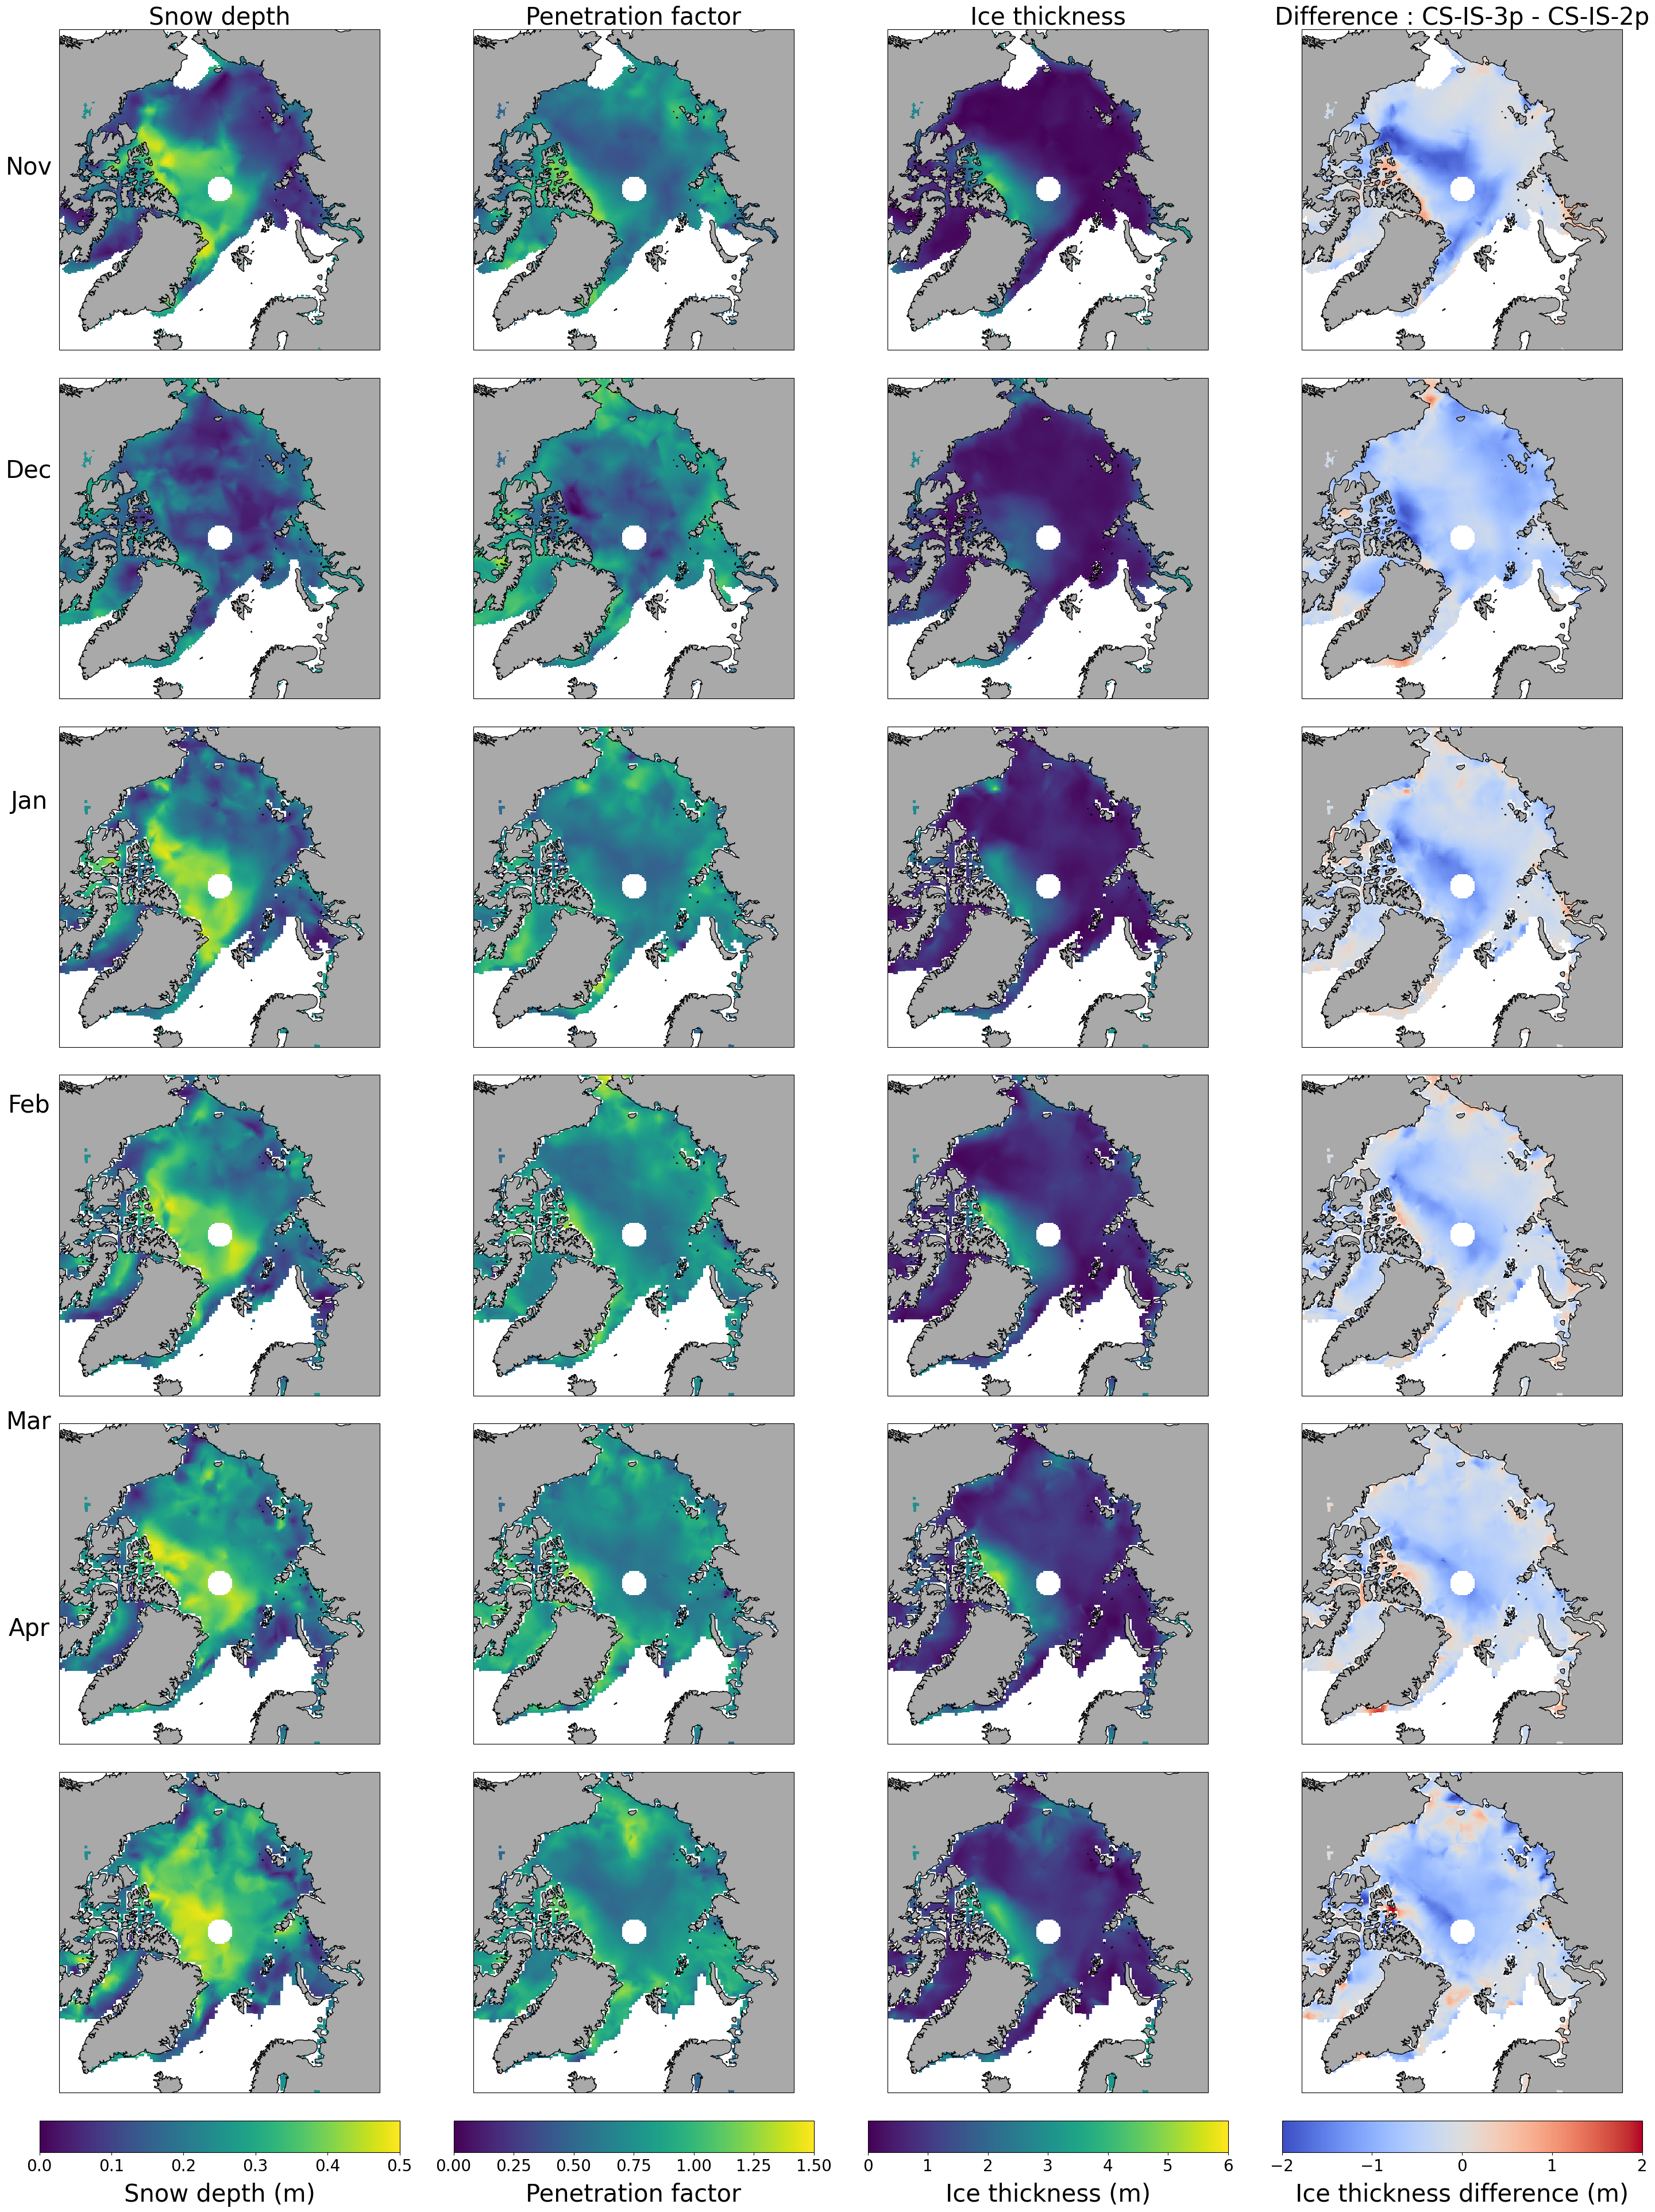

In [15]:
fig = plt.figure(figsize=(36,48))
spec = gridspec.GridSpec(ncols=4, nrows=7, hspace=0.1, wspace=0.15, height_ratios=[1,1,1, 1, 1, 1, 0.1])

months = ["November 2018", "April 2019", "November 2019", "April 2020", "November 2020", "April 2021"]

lon_g = np.load("/home/erb/masterproject/MSCI_project/new_lon_25km.npy")
lat_g = np.load("/home/erb/masterproject/MSCI_project/new_lat_25km.npy")

for i in range(6):
    ax = fig.add_subplot(spec[i,0],projection=ccrs.NorthPolarStereo())
    if i == 0: 
        ax.set_title('Snow depth', fontsize = 30)
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=1)
    ax.coastlines()  
    p_map_snow = ax.pcolormesh(lon_g,lat_g, snow_csis3p[i],cmap='viridis',alpha=1.0, transform=ccrs.PlateCarree(), vmin = 0, vmax = 0.5)

    
    ax2 = fig.add_subplot(spec[i,1],projection=ccrs.NorthPolarStereo())
    if i == 0: 
        ax2.set_title('Penetration factor', fontsize = 30)
    ax2.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    ax2.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=1)
    ax2.coastlines()  
    p_map_penetration = ax2.pcolormesh(lon_g,lat_g, penetration_csis3p[i],cmap='viridis',alpha=1.0, transform=ccrs.PlateCarree(), vmin = 0, vmax = 1.5)


    ax3 = fig.add_subplot(spec[i,2],projection=ccrs.NorthPolarStereo())
    if i == 0: 
        ax3.set_title('Ice thickness', fontsize = 30)
    ax3.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    ax3.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=1)
    ax3.coastlines()  
    p_map_ice = ax3.pcolormesh(lon_g,lat_g, ice_csis3p[i],cmap='viridis',alpha=1.0, transform=ccrs.PlateCarree(), vmin = 0, vmax = 6)


    ax4 = fig.add_subplot(spec[i,3],projection=ccrs.NorthPolarStereo())
    if i == 0: 
        ax4.set_title('Difference : CS-IS-3p - CS-IS-2p', fontsize = 30)
    ax4.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    ax4.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=1)
    ax4.coastlines()  
    p_map_diff = ax4.pcolormesh(lon_g,lat_g, ice_csis3p[i] - ice_csis2p[i],cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree(), vmin = -2, vmax = 2)


date = ['Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr']

fig.text(0.12, 0.83, date[0], va='center', ha='center', fontsize=30)
fig.text(0.12, 0.72, date[1], va='center', ha='center', fontsize=30)
fig.text(0.12, 0.6, date[2], va='center', ha='center', fontsize=30)
fig.text(0.12, 0.49, date[3], va='center', ha='center', fontsize=30)
fig.text(0.12, 0.375, date[4], va='center', ha='center', fontsize=30)
fig.text(0.12, 0.3, date[5], va='center', ha='center', fontsize=30)

cax = fig.add_subplot(spec[24])
fig.colorbar(p_map_snow, cax =cax, orientation = "horizontal")
cax.xaxis.set_ticks_position('bottom')
cax.set_xlabel('Snow depth (m)', labelpad = 10, fontsize = 30)
cax.tick_params(axis='x', labelsize=20)
cax.xaxis.set_label_position('bottom')

cax = fig.add_subplot(spec[25])
fig.colorbar(p_map_penetration, cax =cax, orientation = "horizontal")
cax.xaxis.set_ticks_position('bottom')
cax.set_xlabel('Penetration factor', labelpad = 10, fontsize = 30)
cax.tick_params(axis='x', labelsize=20)
cax.xaxis.set_label_position('bottom')

cax = fig.add_subplot(spec[26])
fig.colorbar(p_map_ice, cax =cax, orientation = "horizontal")
cax.xaxis.set_ticks_position('bottom')
cax.set_xlabel('Ice thickness (m)', labelpad = 10, fontsize = 30)
cax.tick_params(axis='x', labelsize=20)
cax.xaxis.set_label_position('bottom')


cax = fig.add_subplot(spec[27])
fig.colorbar(p_map_diff, cax =cax, orientation = "horizontal")
cax.xaxis.set_ticks_position('bottom')
cax.set_xlabel('Ice thickness difference (m)', labelpad = 10, fontsize = 30)
cax.tick_params(axis='x', labelsize=20)
cax.xaxis.set_label_position('bottom')

